In [2]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns
from DecisionTree import DecisionTree
from RandomForest import RandomForest
from Performance import confusion_matrix, precision, recall, f1_score, accuracy
from Tuning import stratified_split, check_label_leakage, check_feature_label_correlation, hyperparameter_tuning, hyperparameter_tuning_rf, compute_feature_importances

Dataset Overview:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \

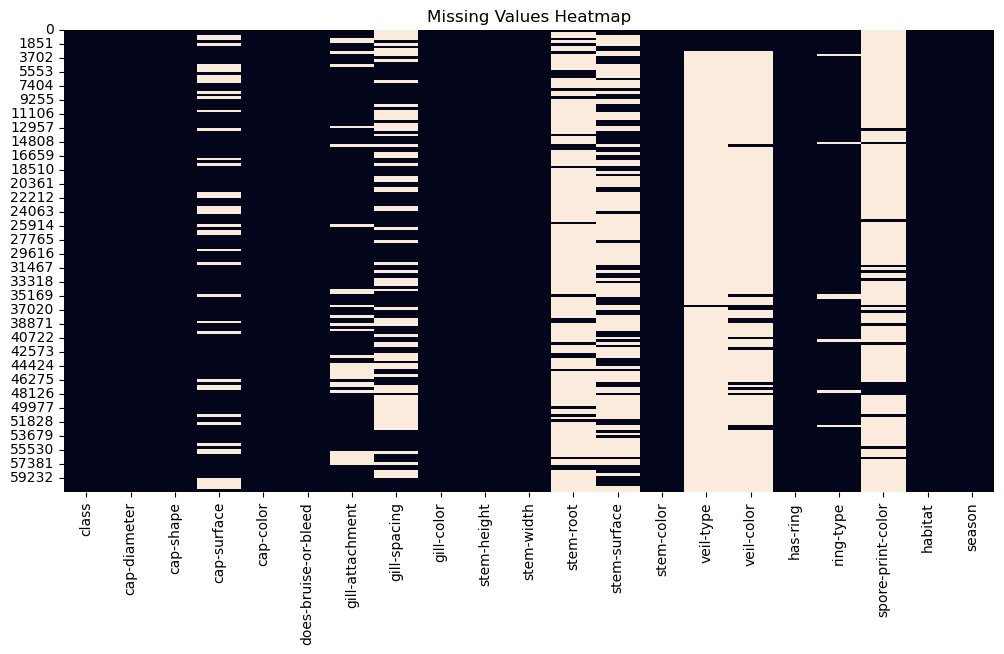


Target Variable Distribution:
class
p    33888
e    27181
Name: count, dtype: int64


c:\Users\Asus\anaconda3\Nuova cartella\envs\Pythonproject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\anaconda3\Nuova cartella\envs\Pythonproject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\anaconda3\Nuova cartella\envs\Pythonproject\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


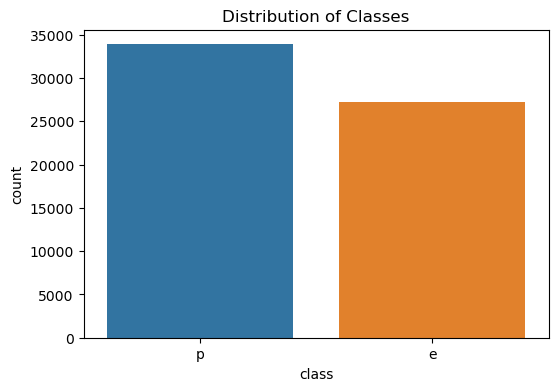


Numerical Columns:
['stem-width', 'stem-height', 'cap-diameter']

Categorical Columns:
['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

Statistical Summary of Numerical Features:
         stem-width   stem-height  cap-diameter
count  61069.000000  61069.000000  61069.000000
mean      12.149410      6.581538      6.733854
std       10.035955      3.370017      5.264845
min        0.000000      0.000000      0.380000
25%        5.210000      4.640000      3.480000
50%       10.190000      5.950000      5.860000
75%       16.570000      7.740000      8.540000
max      103.910000     33.920000     62.340000

Correlation Matrix:
              stem-width  stem-height  cap-diameter
stem-width      1.000000     0.436117       0.69533
stem-height     0.436117     1.000000       0.42256
cap-dia

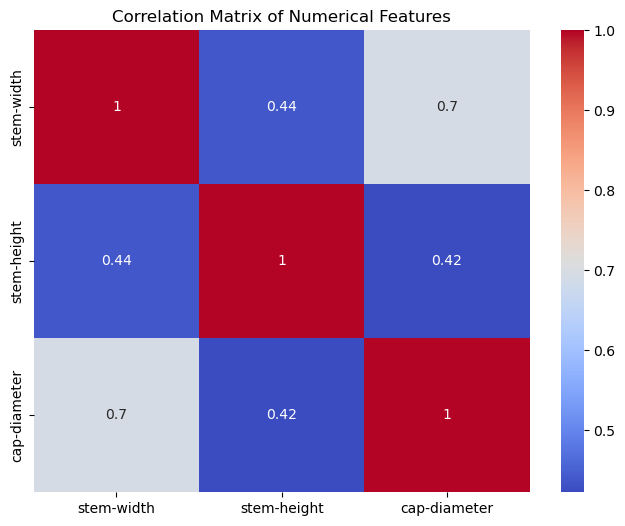


Columns to Remove due to High Missing Values:
['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']

Total missing values in training set before imputing: 30801
Total missing values in training set after imputing: 0

Updated Numerical Columns:
['stem-width', 'stem-height', 'cap-diameter']

Updated Categorical Columns:
['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

No label leakage detected in training data.
Criterion: gini, Max Depth: None, Min Samples Split: 2, Min Impurity Decrease: 0.0, Validation Error: 0.0027018175863762896
Criterion: gini, Max Depth: None, Min Samples Split: 5, Min Impurity Decrease: 0.0, Validation Error: 0.002865564106762731
Criterion: gini, Max Depth: None, Min Samples Split: 10, Min Impurity Decrease: 0.0, Validation Error: 0.0027018175863762896
Criterion: gini, Max Depth: 5, Min Samples Split: 2, Min Impuri

In [ ]:
if __name__ == "__main__":
    # Load the dataset with the correct delimiter
    file_path = 'C:/Users/Asus/OneDrive/Desktop/mushroom_classification/MushroomDataset/secondary_data.csv'  
    data = pd.read_csv(file_path, delimiter=';')

    # Overview of the dataset
    print("Dataset Overview:")
    print(data.head())

    # Dataset shape
    print("\nDataset Shape:")
    print(data.shape)

    # Data types of each column
    print("\nData Types:")
    print(data.dtypes)

    # Checking for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Plot missing values heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False)
    plt.title('Missing Values Heatmap')
    plt.show()

    # Distribution of the target variable
    print("\nTarget Variable Distribution:")
    print(data['class'].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(x='class', data=data)
    plt.title('Distribution of Classes')
    plt.show()

    # Identifying numerical and categorical columns
    numerical_cols = ['stem-width', 'stem-height', 'cap-diameter']  # Adjust according to your dataset
    categorical_cols = [col for col in data.columns if col not in numerical_cols + ['class']]

    print("\nNumerical Columns:")
    print(numerical_cols)

    print("\nCategorical Columns:")
    print(categorical_cols)

    # Statistical summaries for numerical features
    print("\nStatistical Summary of Numerical Features:")
    print(data[numerical_cols].describe())

    # Correlation matrix for numerical features
    print("\nCorrelation Matrix:")
    corr_matrix = data[numerical_cols].corr()
    print(corr_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # Prepare the target variable
    if 'class' in data.columns:
        y = data['class'].map({'p': 1, 'e': 0}).values
        data_features = data.drop(columns=['class'])
    else:
        raise ValueError("Target variable 'class' not found in the dataset.")

    # Convert the DataFrame to a NumPy array
    X = data_features.values

    # Use stratified splitting before data cleaning
    X_temp, X_test, y_temp, y_test = stratified_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = stratified_split(X_temp, y_temp, test_size=0.25, random_state=42)

    # Convert X_train, X_val, X_test back to DataFrames
    feature_columns = data_features.columns
    X_train_df = pd.DataFrame(X_train, columns=feature_columns)
    X_val_df = pd.DataFrame(X_val, columns=feature_columns)
    X_test_df = pd.DataFrame(X_test, columns=feature_columns)

    # Remove columns with a high percentage of missing data based on training data
    missing_threshold = 0.5  # Threshold for missing values
    columns_to_remove = X_train_df.columns[X_train_df.isnull().mean() > missing_threshold].tolist()
    print("\nColumns to Remove due to High Missing Values:")
    print(columns_to_remove)

    # Drop the columns from training, validation, and test sets
    X_train_df = X_train_df.drop(columns=columns_to_remove)
    X_val_df = X_val_df.drop(columns=columns_to_remove)
    X_test_df = X_test_df.drop(columns=columns_to_remove)

    # Check of the missing values before imputing
    total_missing_before = X_train_df.isnull().sum().sum()
    print("\nTotal missing values in training set before imputing:", total_missing_before)

    # Imputation
    for column in X_train_df.columns:
        if column in numerical_cols:
            # Numerical variable: imputed with the mean
            mean = X_train_df[column].astype(float).mean()
            X_train_df[column].fillna(mean, inplace=True)
            X_val_df[column].fillna(mean, inplace=True)
            X_test_df[column].fillna(mean, inplace=True)
        else:
            # Categorical variable: imputed with the mode
            mode = X_train_df[column].mode()[0]
            X_train_df[column].fillna(mode, inplace=True)
            X_val_df[column].fillna(mode, inplace=True)
            X_test_df[column].fillna(mode, inplace=True)

    # Check for missing values after imputing
    total_missing_after = X_train_df.isnull().sum().sum()
    print("Total missing values in training set after imputing:", total_missing_after)

    # Update lists of numerical and categorical columns after cleaning
    numerical_cols = [col for col in numerical_cols if col in X_train_df.columns]
    categorical_cols = [col for col in X_train_df.columns if col not in numerical_cols]

    print("\nUpdated Numerical Columns:")
    print(numerical_cols)

    print("\nUpdated Categorical Columns:")
    print(categorical_cols)

    # Convert categorical variables to object type
    X_train_df[categorical_cols] = X_train_df[categorical_cols].astype(str)
    X_val_df[categorical_cols] = X_val_df[categorical_cols].astype(str)
    X_test_df[categorical_cols] = X_test_df[categorical_cols].astype(str)

    # Combine the data
    X_train = X_train_df.values
    X_val = X_val_df.values
    X_test = X_test_df.values

    # Create feature types list
    feature_types = []
    for col in X_train_df.columns:
        if col in numerical_cols:
            feature_types.append('numerical')
        else:
            feature_types.append('categorical')

    # Verify that labels are not included in features
    if check_label_leakage(X_train, y_train):
        print("Label leakage detected in training data! Please check your data.")
    else:
        print("\nNo label leakage detected in training data.")

    # Check for perfect correlation between features and labels in training data
    check_feature_label_correlation(X_train, y_train)

    # Define criteria and stopping parameters for hyperparameter tuning (Decision Tree)
    criteria = ['gini', 'entropy', 'squared_impurity']
    stopping_params = {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_impurity_decrease': [0.0]
    }

    # Perform hyperparameter tuning for Decision Tree
    best_tree, best_params, best_score = hyperparameter_tuning(
        X_train, y_train, X_val, y_val, feature_types, criteria, stopping_params)

    print("\nBest Parameters for Decision Tree:")
    print(best_params)
    print(f"Best Validation Error for Decision Tree: {best_score}")

    # Evaluate the best Decision Tree on training set
    y_train_pred = best_tree.predict(X_train)
    training_error = np.mean(y_train_pred != y_train)
    print(f"Training Error of the Best Decision Tree: {training_error}")

    # Additional evaluation metrics on validation set
    y_val_pred = best_tree.predict(X_val)
    tp, tn, fp, fn = confusion_matrix(y_val, y_val_pred)
    prec = precision(tp, fp)
    rec = recall(tp, fn)
    f1 = f1_score(prec, rec)
    acc = accuracy(tp, tn, fp, fn)

    print("\nEvaluation Metrics on Validation Set for Decision Tree:")
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

    # Prune the tree using the validation set
    best_tree.prune(X_val, y_val)

    # Evaluate the pruned tree on validation set
    y_val_pred_pruned = best_tree.predict(X_val)
    error_pruned = np.mean(y_val_pred_pruned != y_val)
    tp_pruned, tn_pruned, fp_pruned, fn_pruned = confusion_matrix(y_val, y_val_pred_pruned)
    prec_pruned = precision(tp_pruned, fp_pruned)
    rec_pruned = recall(tp_pruned, fn_pruned)
    f1_pruned = f1_score(prec_pruned, rec_pruned)
    acc_pruned = accuracy(tp_pruned, tn_pruned, fp_pruned, fn_pruned)

    print("\nAfter Pruning the Decision Tree:")
    print(f"Validation Error after Pruning: {error_pruned}")
    print(f"Accuracy: {acc_pruned}")
    print(f"Precision: {prec_pruned}")
    print(f"Recall: {rec_pruned}")
    print(f"F1 Score: {f1_pruned}")
    print(f"Confusion Matrix: TP={tp_pruned}, TN={tn_pruned}, FP={fp_pruned}, FN={fn_pruned}")

    # Evaluate the pruned Decision Tree on test set
    y_test_pred = best_tree.predict(X_test)
    test_error = np.mean(y_test_pred != y_test)
    tp_test, tn_test, fp_test, fn_test = confusion_matrix(y_test, y_test_pred)
    prec_test = precision(tp_test, fp_test)
    rec_test = recall(tp_test, fn_test)
    f1_test = f1_score(prec_test, rec_test)
    acc_test = accuracy(tp_test, tn_test, fp_test, fn_test)

    print("\nEvaluation Metrics on Test Set for Decision Tree:")
    print(f"Test Error: {test_error}")
    print(f"Accuracy: {acc_test}")
    print(f"Precision: {prec_test}")
    print(f"Recall: {rec_test}")
    print(f"F1 Score: {f1_test}")
    print(f"Confusion Matrix: TP={tp_test}, TN={tn_test}, FP={fp_test}, FN={fn_test}")

    # Hyperparameter tuning for Random Forest
    print("\nHyperparameter Tuning for Random Forest...")
    rf_params = {
        'n_estimators': [10, 30, 50],
        'max_features': ['sqrt'],
        'criterion': ['gini', 'entropy', 'squared_impurity'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_impurity_decrease': [0.0],
    }

    best_forest, best_rf_params, best_rf_score = hyperparameter_tuning_rf(
        X_train, y_train, X_val, y_val, feature_types, rf_params)

    print("\nBest Parameters for Random Forest:")
    print(best_rf_params)
    print(f"Best Validation Error for Random Forest: {best_rf_score}")

    # Evaluate the optimized Random Forest on validation set
    y_val_pred_rf = best_forest.predict(X_val)
    validation_error_rf = np.mean(y_val_pred_rf != y_val)
    tp_rf, tn_rf, fp_rf, fn_rf = confusion_matrix(y_val, y_val_pred_rf)
    prec_rf = precision(tp_rf, fp_rf)
    rec_rf = recall(tp_rf, fn_rf)
    f1_rf = f1_score(prec_rf, rec_rf)
    acc_rf = accuracy(tp_rf, tn_rf, fp_rf, fn_rf)

    print(f"\nOptimized Random Forest Validation Error: {validation_error_rf}")
    print("\nOptimized Random Forest Evaluation Metrics on Validation Set:")
    print(f"Accuracy: {acc_rf}")
    print(f"Precision: {prec_rf}")
    print(f"Recall: {rec_rf}")
    print(f"F1 Score: {f1_rf}")
    print(f"Confusion Matrix: TP={tp_rf}, TN={tn_rf}, FP={fp_rf}, FN={fn_rf}")

    # Evaluate the optimized Random Forest on test set
    y_test_pred_rf = best_forest.predict(X_test)
    test_error_rf = np.mean(y_test_pred_rf != y_test)
    tp_test_rf, tn_test_rf, fp_test_rf, fn_test_rf = confusion_matrix(y_test, y_test_pred_rf)
    prec_test_rf = precision(tp_test_rf, fp_test_rf)
    rec_test_rf = recall(tp_test_rf, fn_test_rf)
    f1_test_rf = f1_score(prec_test_rf, rec_test_rf)
    acc_test_rf = accuracy(tp_test_rf, tn_test_rf, fp_test_rf, fn_test_rf)

    print(f"\nOptimized Random Forest Test Error: {test_error_rf}")
    print("\nOptimized Random Forest Evaluation Metrics on Test Set:")
    print(f"Accuracy: {acc_test_rf}")
    print(f"Precision: {prec_test_rf}")
    print(f"Recall: {rec_test_rf}")
    print(f"F1 Score: {f1_test_rf}")
    print(f"Confusion Matrix: TP={tp_test_rf}, TN={tn_test_rf}, FP={fp_test_rf}, FN={fn_test_rf}")

    # Feature importance analysis with the optimized Random Forest
    print("\nComputing feature importances with the optimized Random Forest...")
    importances = compute_feature_importances(best_forest)
    feature_importances = sorted(zip(X_train_df.columns, importances), key=lambda x: x[1], reverse=True)

    print("\nFeature Importances:")
    for feature, importance in feature_importances:
        print(f"Feature: {feature}, Importance: {importance}")

    # Plot feature importances
    features = [f[0] for f in feature_importances]
    importances_values = [f[1] for f in feature_importances]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances_values, y=features)
    plt.title('Feature Importances from Optimized Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()